# 2018/2019 - Task List 3

1. Create simple pyro model, that models any real life situation. Use Pyro [docs](http://pyro.ai/examples/intro_part_i.html). 

 Requirements:

 - not weather (not same as in docs)
 - two distributions
 - one of distribution can result in more than 2 results (not Bernoulli)
   
   
2. Acquire two appropriate datasets from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/)  and provide an exploratory analysis of its content:

 Dataset requirements:
 
 - at least five numerical attributes attributes
 - at least 1000 instances

 Tasks:
    
 - scatter plot of EACH attribute pair (matrix of plots), on diagonal we want to see histogram of given attribute ([tutorial](https://seaborn.pydata.org/tutorial/distributions.html), [docs](https://seaborn.pydata.org/generated/seaborn.PairGrid.html#seaborn.PairGrid) , [docs](https://pandas.pydata.org/pandas-docs/stable/visualization.html#scatter-matrix-plot))
 - scatter plot of each attribute pair with histograms on axes (write a function that generates plot for given attributes pair) ([link](https://seaborn.pydata.org/generated/seaborn.jointplot.html#seaborn.jointplot))
 - correlation (for EACH attribute pair, if appropriate)
 - covariances (for EACH attribute pair, if appropriate)

 Elaborate on results.

## Required imports

In [1]:
%matplotlib inline
import pyro
import torch
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

# Speeding up sampling

In [41]:
%%timeit -n 10

for _ in range(1000):
    pyro.sample('variable', pyro.distributions.Bernoulli(0.3))

33.4 ms ± 732 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Use vectorization (sample many at once, look at docs)

In [42]:
%%timeit -n 10
count = 1000
with pyro.plate("name", 1000) as _:
        data = pyro.sample('variable', pyro.distributions.Bernoulli(0.3))
        assert(len(data)==1000)

461 µs ± 185 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Task 1

In [75]:
def eye_color():
    parents = pyro.distributions.Categorical(probs = torch.tensor([0.16666666666, 0.16666666666,0.16666666666,0.16666666666,0.16666666666,0.16666666666])).sample()

    parents_eyes = ''
    
    if parents.item() == 0.0:
        parents_eyes = 'brown & brown' 
    if parents.item() == 1.0:
        parents_eyes = 'green & brown'
    if parents.item() == 2.0:
        parents_eyes = 'blue & brown' 
    if parents.item() == 3.0:
        parents_eyes = 'green & green' 
    if parents.item() == 4.0:
        parents_eyes = 'green & blue' 
    if parents.item() == 5.0: 
        parents_eyes ='blue & blue'
    
    child = {'brown & brown':[0.75,0.1875,0.625], 'green & brown': [0.5,0.375,0.125], 'blue & brown':[0.5,0,0.5], 'green & green':[0.1,0.75,0.24], 'green & blue':[0,0.5,0.5], 'blue & blue':[0,0.1,0.99]}
   
    child_eyes = pyro.distributions.Categorical(probs = torch.tensor(child[parents_eyes])).sample()
    mapper = {'0':'brown','1':'green','2':'blue'}
    return parents_eyes, mapper[str(int(child_eyes))]

eye_color()


('blue & blue', 'blue')

## Task 2

In [119]:
import pandas as pd
import seaborn as sns

In [318]:
# data = pd.read_csv("data1.csv") 
breast_cancer = pd.read_csv("data1.csv", names = ["ID", "Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape","Marginal Adhesion","Single Epithelial Cell Size","Bare Nuclei","Bland Chromatin","Normal Nucleoli","Mitoses","Class"])
mammography = pd.read_csv("data2.csv", names = ["BI-RADS", "Age", "Shape", "Margin","Density","Severity"])
houses = pd.read_excel('data3.xlsx', index_col=0, convert_float = False, names = ['Date', 'House Age',
       'Distance to station',
       'Nr of stores', 'Latitude', 'Longitude',
       'Price'])
# houses = pd.DataFrame(houses)
breast_cancer = breast_cancer.drop("ID", axis=1)

In [308]:
def preprocess_dataframe(df,dtype):
    df = (df[(df != '?').all(axis=1)])
    df.iloc[:,:-1] = (df.iloc[:,:-1]).astype(dtype)
    return df

In [222]:
breast_cancer = preprocess_dataframe(breast_cancer)

In [345]:
# mammography = preprocess_dataframe(mammography)

In [320]:
houses = preprocess_dataframe(houses,float)

In [163]:
def map_labels(df,dictionary,column):
    df = df.replace({column: dictionary})
    return df

In [223]:
breast_cancer = map_labels(breast_cancer,{2: "benign", 4: "malignant"},'Class')  

In [224]:
mammography = map_labels(mammography,{0: "benign", 1: "malignant"},'Severity') 

In [263]:
print(breast_cancer.columns, mammography.columns)

Index(['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object') Index(['BI-RADS', 'Age', 'Shape', 'Margin', 'Density', 'Severity'], dtype='object')


In [254]:
for col in mammography.columns:
    print(mammography.loc[0, col], type(mammography.loc[0, col]))
    

5 <class 'int'>
67 <class 'int'>
3 <class 'int'>
5 <class 'int'>
3 <class 'int'>
malignant <class 'str'>


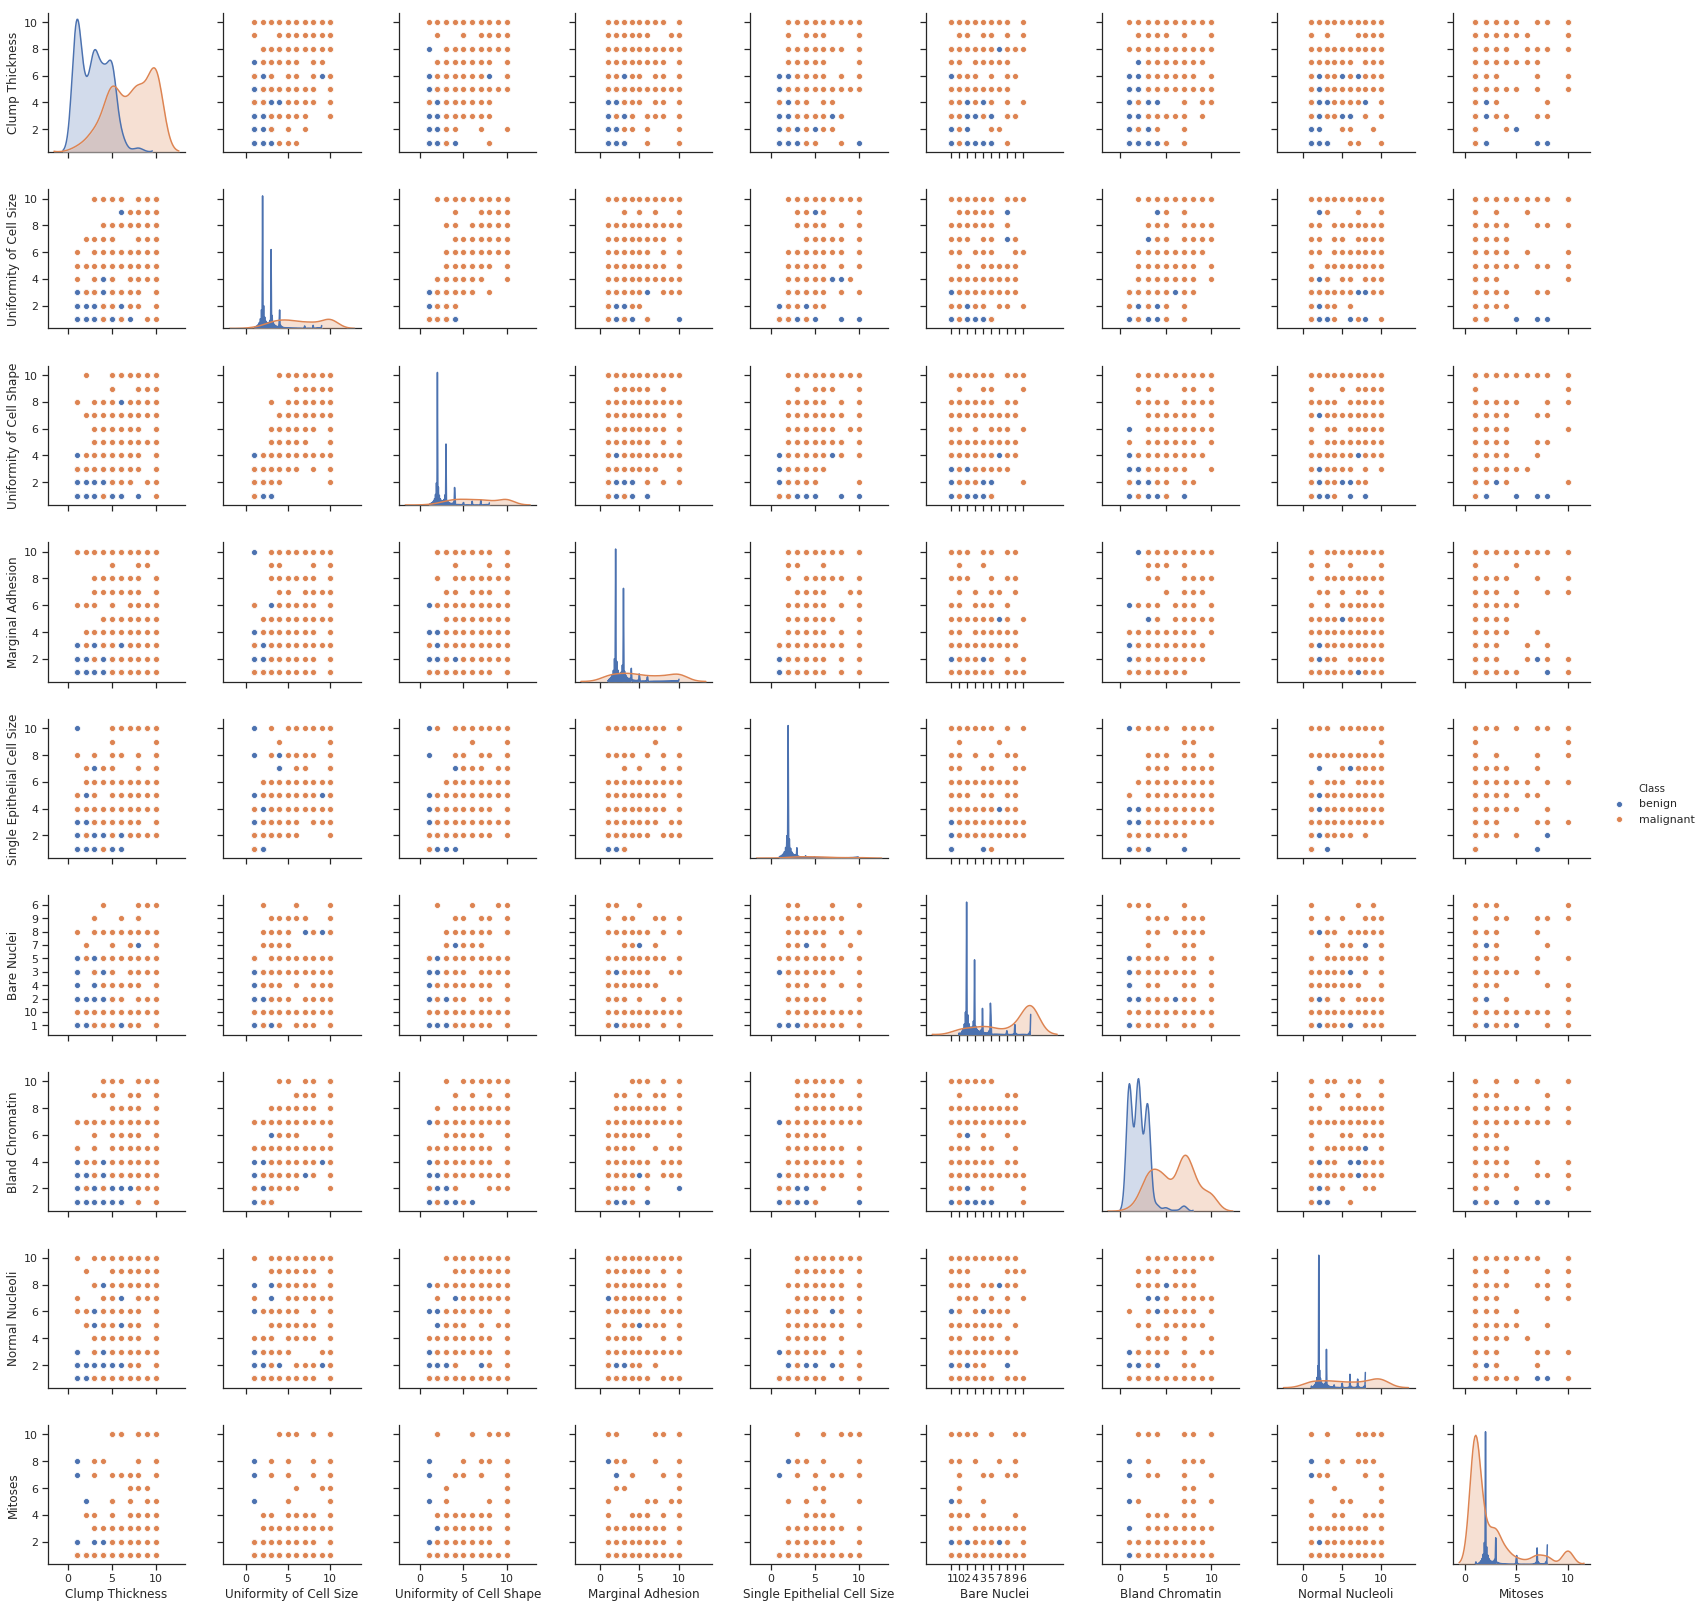

In [173]:
sns.pairplot(breast_cancer, hue="Class")

In [296]:
sns.pairplot(mammography, hue="Severity")

In [328]:
def scatter_plot_hist(data,attr1,attr2):
#     min1 = min(data[attr1])
#     max1 = max(data[attr1])
#     min2 = min(data[attr2])
#     max2 = max(data[attr2])
#     print(min1,min2,max1,max2)
    sns.set(color_codes=True)
    sns.set(style="white", palette="muted")
    sns.jointplot(x=attr1, y=attr2, data=data)


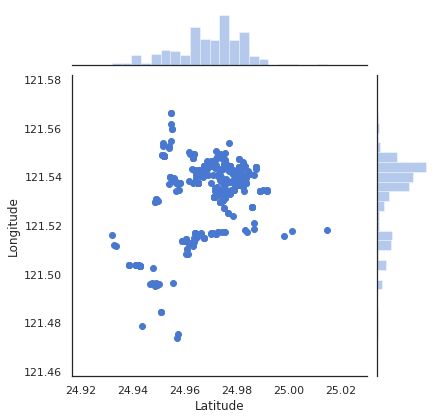

In [329]:
scatter_plot_hist(houses, 'Latitude', 'Longitude')

In [330]:
from itertools import combinations 

def generate_scatter_plots_hist(data):
    comb = combinations(data.columns[:-1], 2) 
    for pair in comb:
        scatter_plot_hist(data, pair[0], pair[1])        

/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


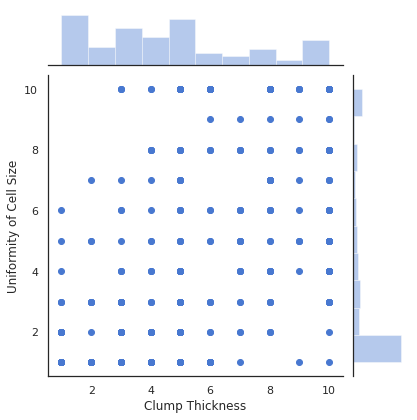

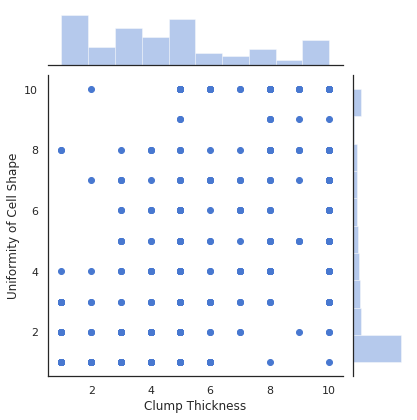

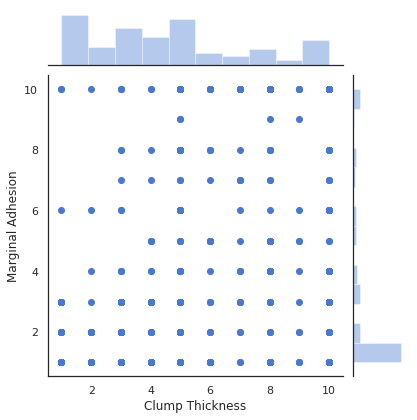

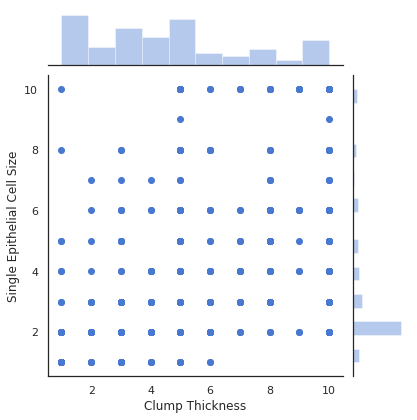

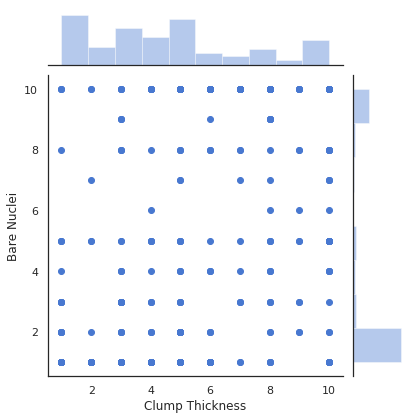

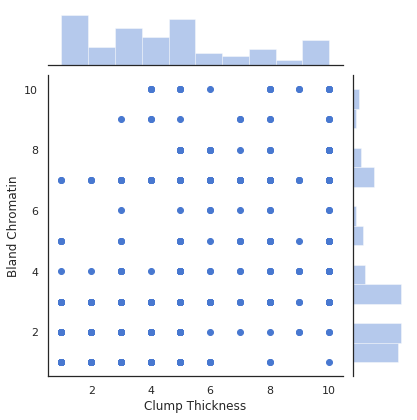

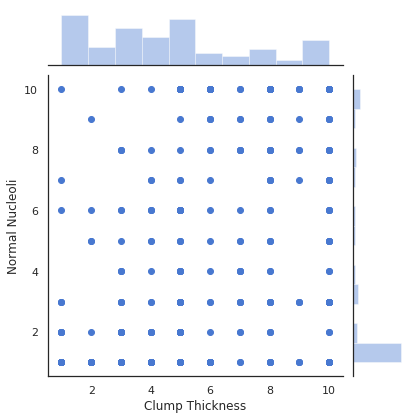

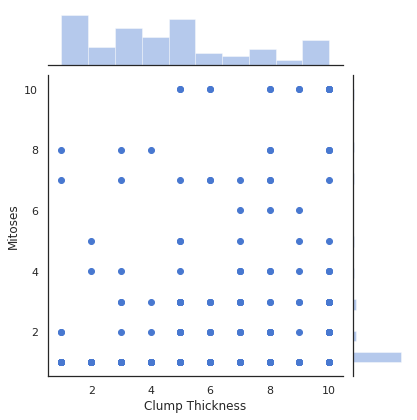

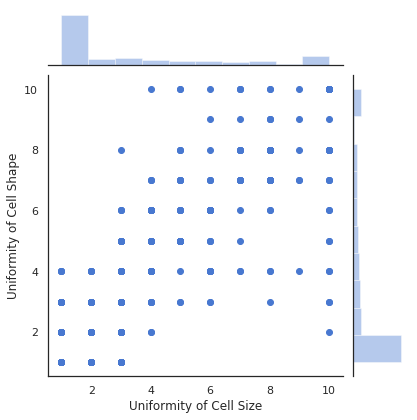

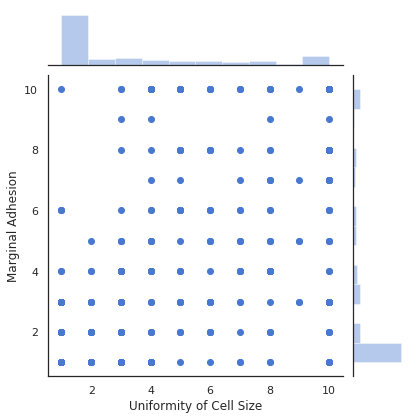

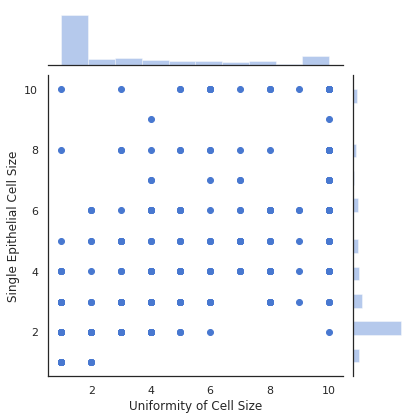

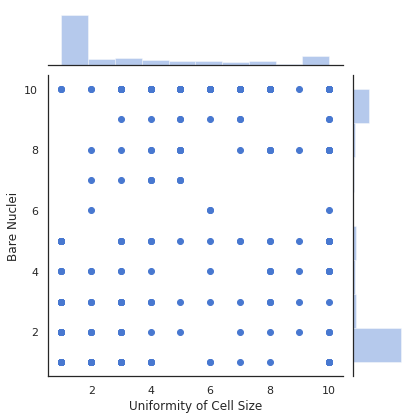

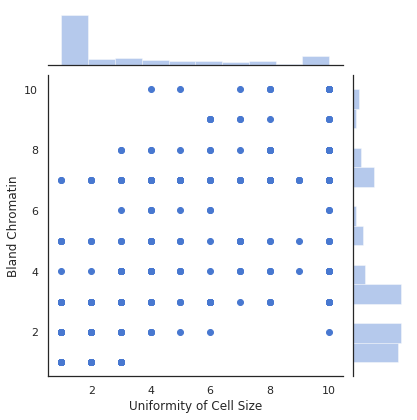

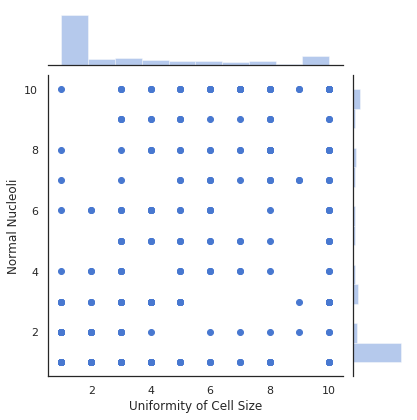

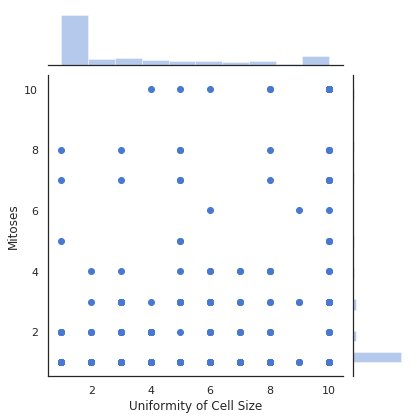

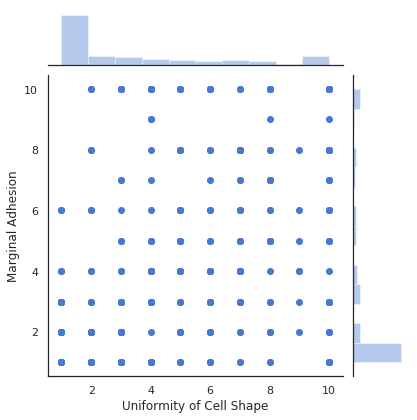

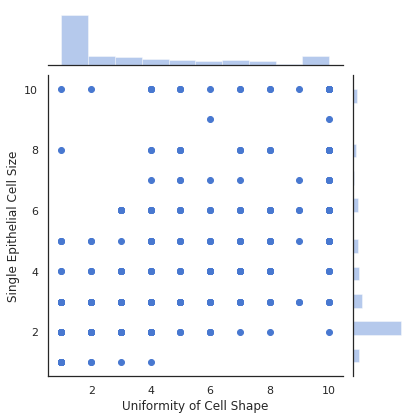

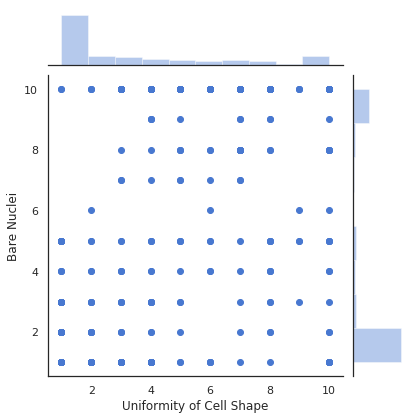

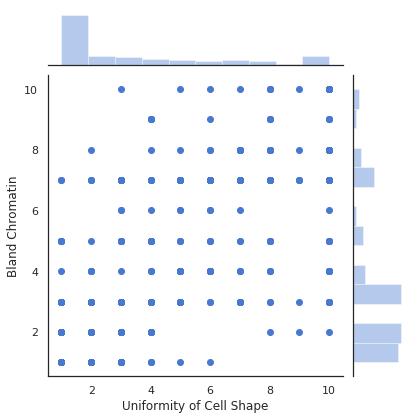

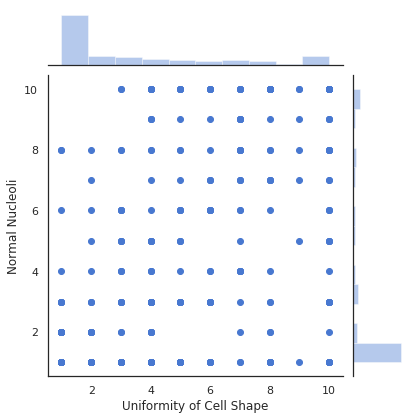

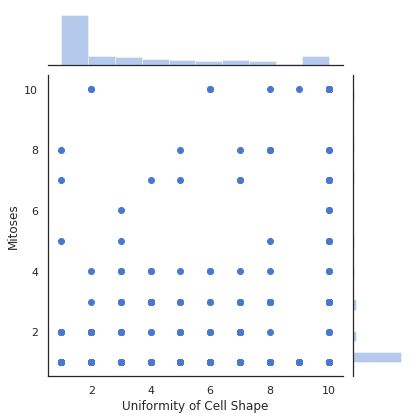

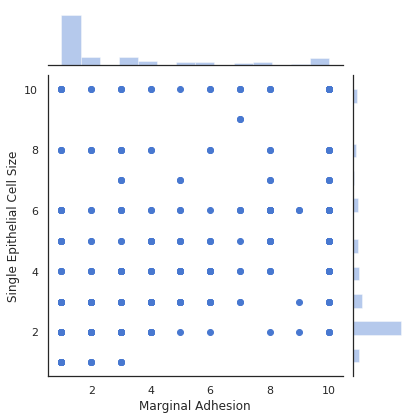

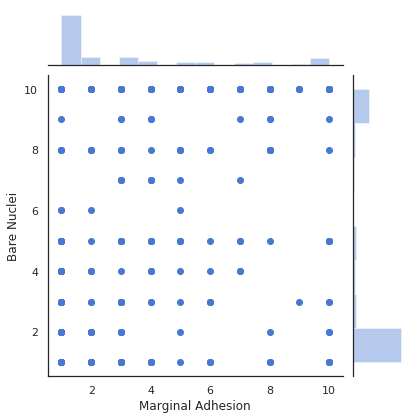

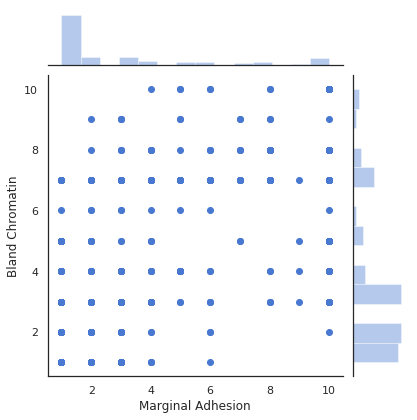

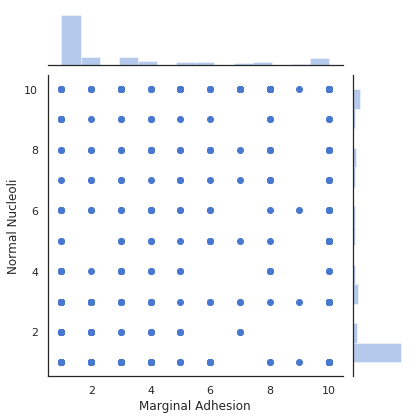

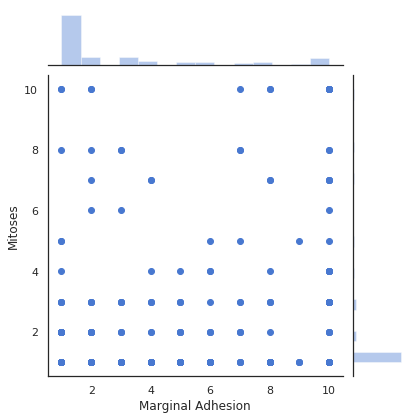

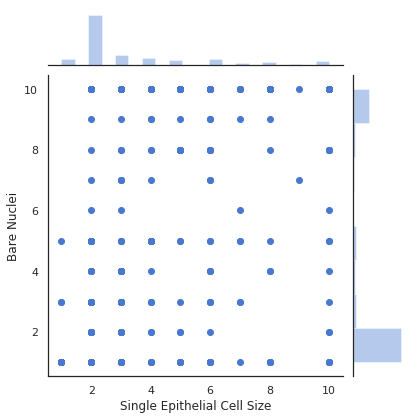

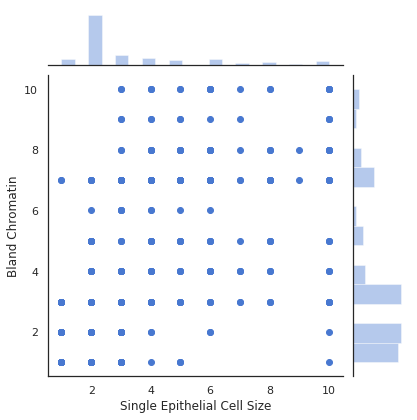

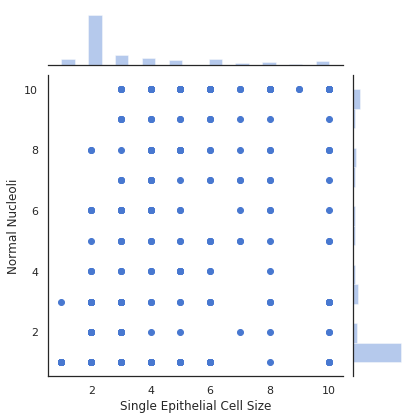

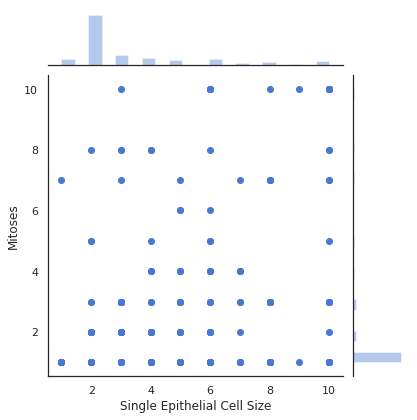

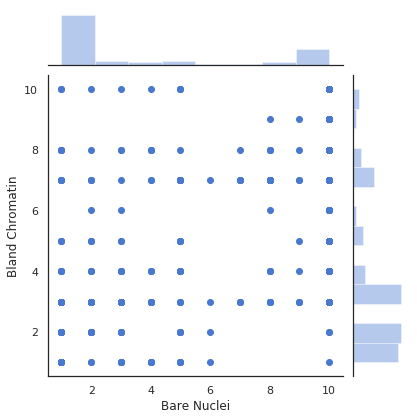

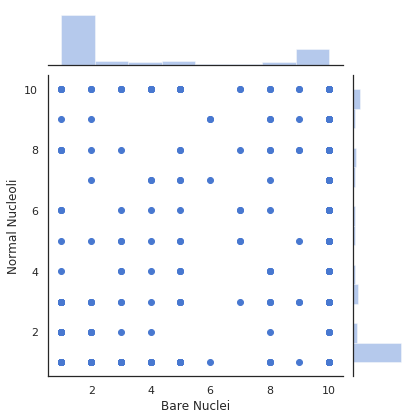

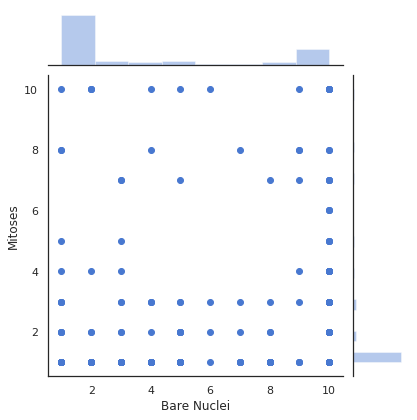

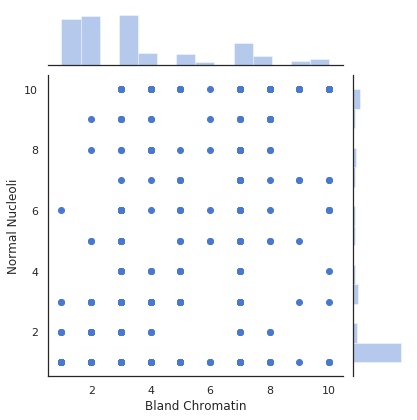

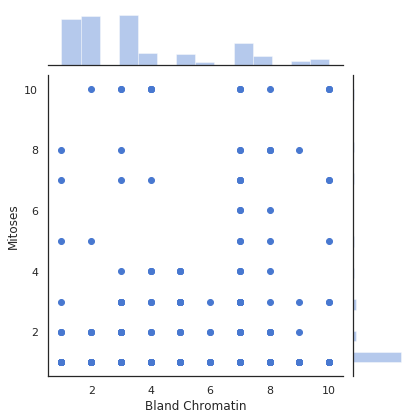

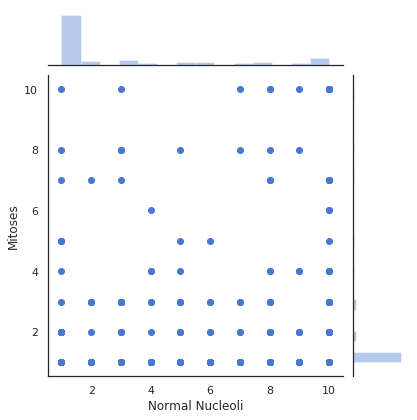

In [259]:
generate_scatter_plots_hist(breast_cancer)

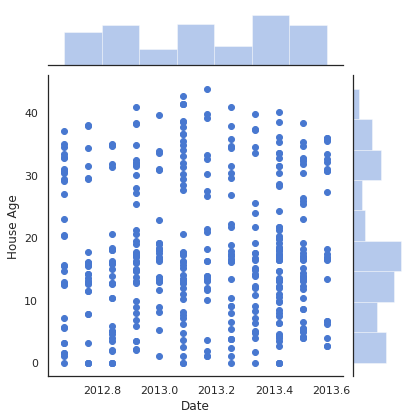

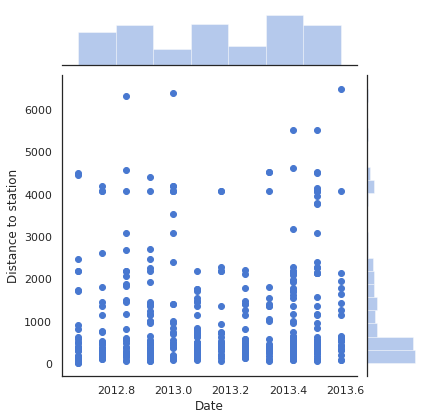

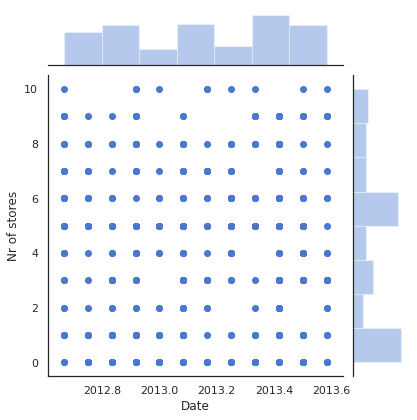

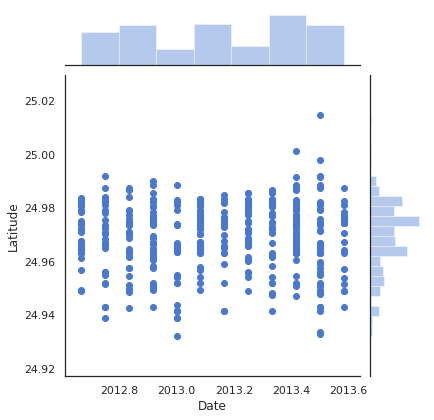

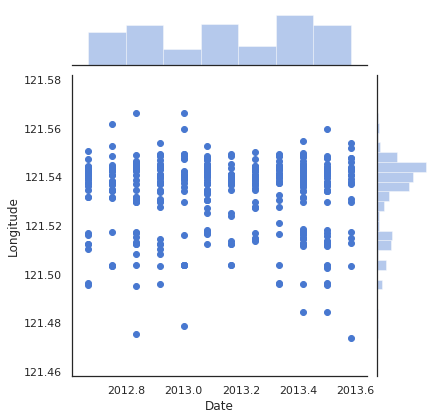

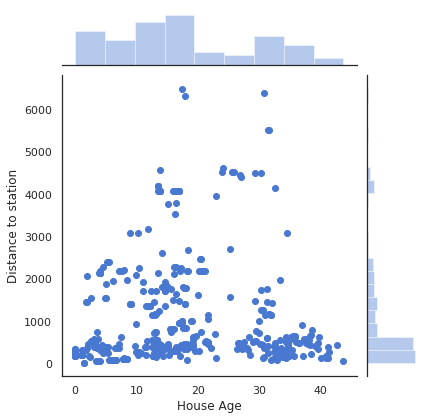

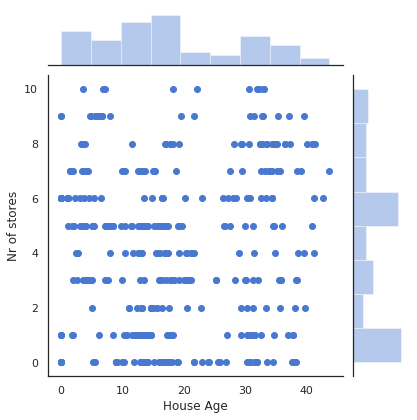

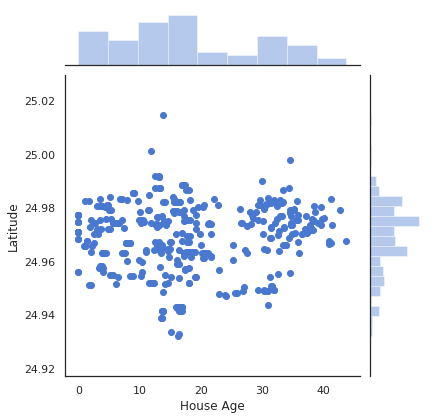

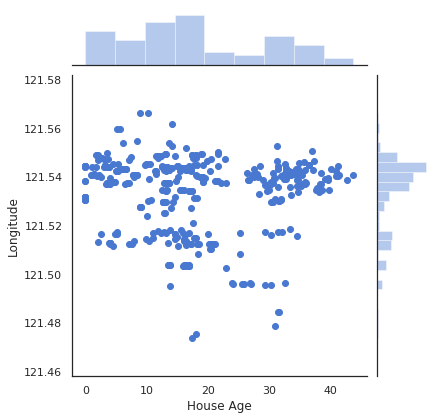

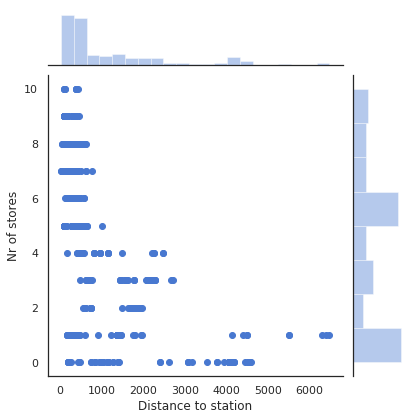

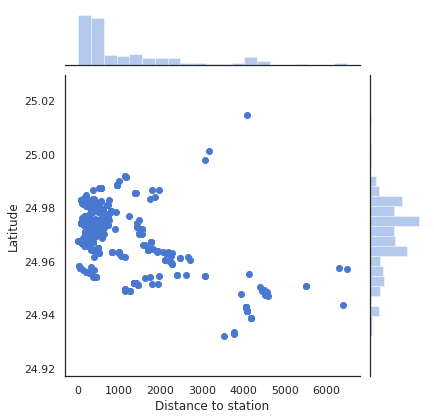

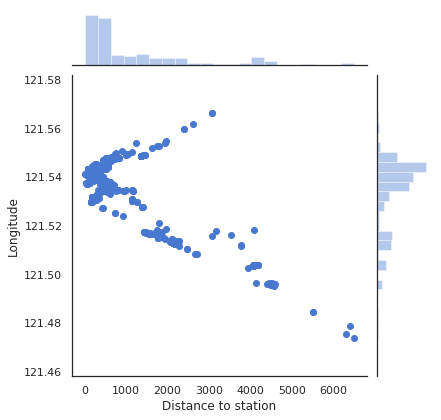

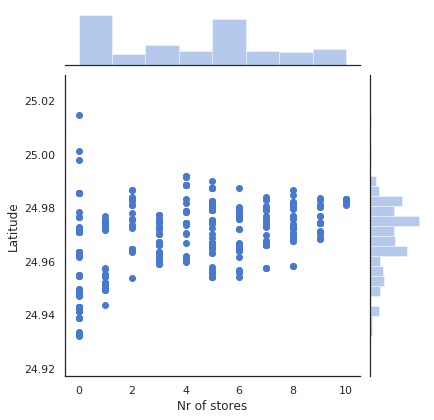

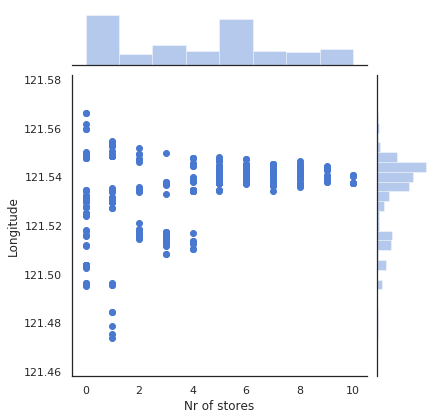

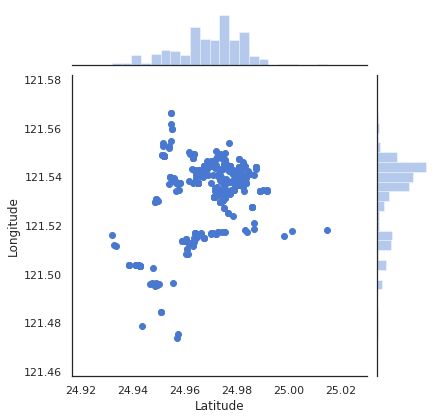

In [331]:
generate_scatter_plots_hist(houses)

In [286]:
def draw_correlation_heatmap(df):
    sns.set(style="white")
    corr = df.corr()
#     sns.heatmap(corr, cmap="YlGnBu")
    sns.heatmap(corr, cmap="BuPu")
    

In [336]:
def draw_covariance_heatmap(df):
    sns.set(style="white")
    cov = df.cov()
    sns.heatmap(cov, cmap="YlGnBu")
#     sns.heatmap(cov, cmap="BuPu")

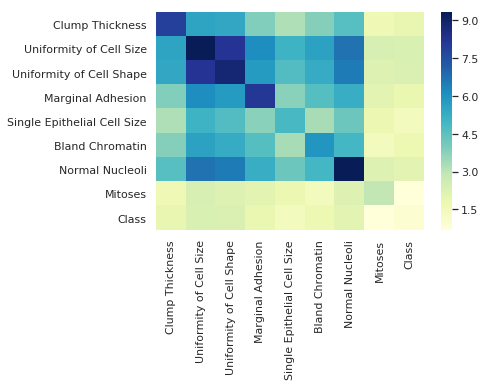

In [337]:
draw_covariance_heatmap(breast_cancer)

In [294]:
def corr(df):
    corr = df.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr, mask=mask, cmap="YlGnBu")
  

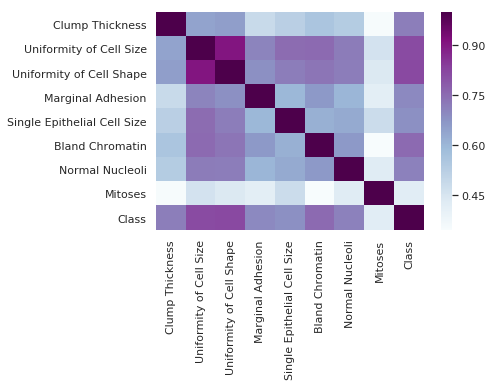

In [339]:
draw_correlation_heatmap(breast_cancer)

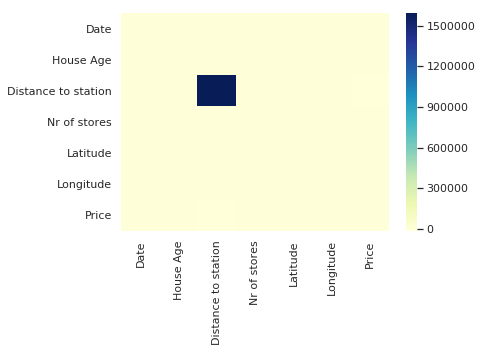

In [344]:
draw_covariance_heatmap(houses)

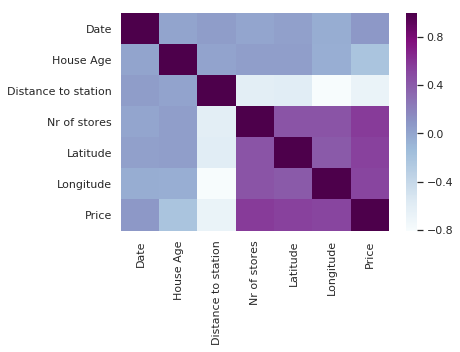

In [338]:
draw_correlation_heatmap(houses)

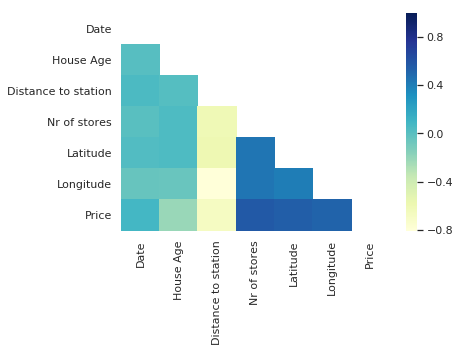

In [333]:
corr(houses)